<a href="https://colab.research.google.com/github/Semalign/ML-practice/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.8905 - loss: 0.3453
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9782 - loss: 0.0568
Test Accuracy: 98.39%
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


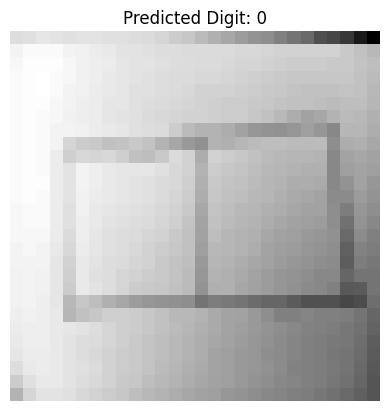

The model predicts your custom digit is: 0


In [95]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape the training and testing data to include the channel dimension (grayscale)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=1)

# Evaluate the model on the test set
train_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Preprocess your custom image
image_path = "/photo_2025-03-16_11-39-22.jpg"  # image file path as 
img = Image.open(image_path).convert("L")  # Convert to grayscale
img = img.resize((28, 28))  # Resize to 28x28 pixels
img_array = np.array(img) / 255.0  # Normalize pixel values
img_array = img_array.reshape(1, 28, 28, 1)  # Ensure shape is (1, 28, 28, 1)

# Add your custom image to the test dataset
X_test_with_custom = np.concatenate([X_test, img_array], axis=0)
y_test_with_custom = np.append(y_test, -1)  # Add a placeholder label for your image

# Predict using the updated test se
predictions = model.predict(X_test_with_custom)
custom_prediction = np.argmax(predictions[-1])  # Prediction for the custom image

# Visualize the custom image
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {custom_prediction}")
plt.axis('off')
plt.show()
# Output the result
print(f"The model predicts your custom digit is: {custom_prediction}")
